In [72]:
import pandas as pd
import matplotlib
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time

In [66]:
# Load CSV files
df = pd.read_csv('D:/Courses/INSY 695/Project Repository/E-commerce_Promotion_Analysis/Datasets/feature_library.csv')

#'D:/Courses/INSY 695/Project Repository/E-commerce_Promotion_Analysis/Datasets/cleaned_trained_data.csv'

In [67]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,19114,1824.843333,3,4,...,0,0,1,0,0,0,1,0,0,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,19114,3093.745000,3,4,...,0,0,1,0,0,0,0,1,0,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821-00-0265,19114,3093.745000,3,4,...,0,0,1,0,0,0,0,0,1,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,19114,3093.745000,3,4,...,0,0,1,0,0,0,0,0,0,1
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,19114,1824.843333,3,4,...,0,0,1,0,0,1,0,0,0,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 62 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   ID                                                  100000 non-null  object 
 1   Customer_ID                                         100000 non-null  object 
 2   Month                                               100000 non-null  object 
 3   Name                                                100000 non-null  object 
 4   Age                                                 100000 non-null  float64
 5   SSN                                                 100000 non-null  object 
 6   Annual_Income                                       100000 non-null  int64  
 7   Monthly_Inhand_Salary                               100000 non-null  float64
 8   Num_Bank_Accounts                                   100000 non-nu

#### Extracting numerical, ordinal and one-hot encoding variables to apply relevant preprocessing

In [ ]:
# Define column groups based on dataset
num_cols = [
    "Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts",
    "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", "Delay_from_due_date",
    "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries",
    "Outstanding_Debt", "Credit_Utilization_Ratio", "Credit_History_Age",
    "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance",
    "income_zscore", "Monthly_Inhand_Salary_log", "Delay_Zscore",
    "Month_num", "Month_sin", "Month_cos"
]


#Encoded one-hot columns
one_hot_cols = [
    "Auto Loan", "Credit-Builder Loan", "Personal Loan", "Home Equity Loan",
    "Not Specified", "No Loan", "Mortgage Loan", "Student Loan", "Debt Consolidation Loan",
    "Payday Loan", 

    "Occupation_Architect", "Occupation_Developer", "Occupation_Doctor",
    "Occupation_Engineer", "Occupation_Entrepreneur", "Occupation_Journalist",
    "Occupation_Lawyer", "Occupation_Manager", "Occupation_Mechanic",
    "Occupation_Media_Manager", "Occupation_Musician", "Occupation_Scientist",
    "Occupation_Teacher", "Occupation_Writer",

    "Credit_Mix_Good", "Credit_Mix_Standard",
    "Payment_of_Min_Amount_Yes",

    "Payment_Behaviour_High_spent_Medium_value_payments",
    "Payment_Behaviour_High_spent_Small_value_payments",
    "Payment_Behaviour_Low_spent_Large_value_payments",
    "Payment_Behaviour_Low_spent_Medium_value_payments",
    "Payment_Behaviour_Low_spent_Small_value_payments"
]


target_col = ["Credit_Score"]

In [70]:
# Apply Label Encoding to each column
for col in target_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

#### Scaling the numerical columns

In [116]:
# Initialize StandardScaler
scaler = StandardScaler()

In [117]:
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target_col), df[target_col], test_size=0.2, random_state=42, stratify=df[target_col]
)

In [118]:
# Fit transformer on training data & apply transformation
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [122]:
# Ensure only numerical features are included
X_train_final = X_train.select_dtypes(exclude=['object'])
X_test_final = X_test.select_dtypes(exclude=['object'])


#### Trying 3 different feature selection methods: RFE, RF Feature Importances, LassoCV

In [123]:
# Define model
model1 = XGBClassifier(random_state=42)

In [124]:
# Apply Recursive Feature Elimination (RFE)
rfe = RFE(estimator = model1, n_features_to_select=10)
X_selected = rfe.fit_transform(X_train_final, y_train)

In [125]:
# Create DataFrame of feature rankings
feature_ranking = pd.DataFrame({'Feature': X_train_final.columns, 'Ranking': rfe.ranking_})

# Sort by ranking
feature_ranking = feature_ranking.sort_values(by="Ranking")

# Display rankings
print(feature_ranking)

                                              Feature  Ranking
49                          Payment_of_Min_Amount_Yes        1
3                                   Num_Bank_Accounts        1
4                                     Num_Credit_Card        1
5                                       Interest_Rate        1
7                                 Delay_from_due_date        1
48                                Credit_Mix_Standard        1
9                                Changed_Credit_Limit        1
20                                          Month_num        1
11                                   Outstanding_Debt        1
47                                    Credit_Mix_Good        1
54   Payment_Behaviour_Low_spent_Small_value_payments        2
37                            Occupation_Entrepreneur        3
14                                Total_EMI_per_month        4
1                                       Annual_Income        5
10                               Num_Credit_Inquiries  

In [126]:
# Define model
model2 = RandomForestClassifier(random_state=42)

In [127]:
# Train a random forest model
model2.fit(X_train_final, y_train)

c:\Users\ZAID\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [128]:
# Get feature importance scores
feature_importances = model2.feature_importances_

# Rank features
feature_ranking = pd.Series(feature_importances, index=X_train_final.columns).sort_values(ascending=False)

In [129]:
# Display top features
print("Feature Importances:")
print(feature_ranking)

Feature Importances:
Outstanding_Debt                                      0.090686
Interest_Rate                                         0.068200
Credit_Mix_Good                                       0.047293
Delay_from_due_date                                   0.041749
Delay_Zscore                                          0.040868
Credit_Mix_Standard                                   0.038390
Changed_Credit_Limit                                  0.037505
Num_Credit_Card                                       0.035474
Num_Credit_Inquiries                                  0.035407
Monthly_Balance                                       0.034289
Annual_Income                                         0.033962
Credit_Utilization_Ratio                              0.033724
Credit_History_Age                                    0.033677
Amount_invested_monthly                               0.032792
Total_EMI_per_month                                   0.031508
Num_of_Delayed_Payment            

In [130]:
# Perform Lasso Feature Selection with Cross-Validation
lasso = LassoCV(cv=5, random_state=42)  # 5-fold cross-validation
lasso.fit(X_train_final, y_train)

c:\Users\ZAID\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(cv=5, random_state=42)

In [131]:
# Get the coefficients of the selected features
lasso_coeffs = pd.Series(lasso.coef_, index=X_train_final.columns)

# Filter out features with non-zero coefficients (important features)
selected_features = lasso_coeffs[lasso_coeffs != 0].sort_values(ascending=False)

In [132]:
# Display selected features
print(f"Selected Features: {selected_features}")

Selected Features: Changed_Credit_Limit                                  0.065485
Num_Credit_Card                                       0.038553
Payment_Behaviour_Low_spent_Small_value_payments      0.036892
Occupation_Mechanic                                   0.035972
Month_cos                                             0.035763
Monthly_Balance                                       0.032692
Monthly_Inhand_Salary_log                             0.029964
Occupation_Writer                                     0.029010
Payment_Behaviour_Low_spent_Medium_value_payments     0.023149
Credit_Mix_Standard                                   0.021809
Payment_Behaviour_Low_spent_Large_value_payments      0.019602
Num_of_Loan                                           0.018963
Occupation_Lawyer                                     0.014517
Payment_Behaviour_High_spent_Small_value_payments     0.013960
Occupation_Doctor                                     0.012664
Credit_History_Age                  

In [133]:
# Select features with non-zero coefficients and sort by absolute importance
top_lasso_features = lasso_coeffs.abs().sort_values(ascending=False).head(10)

# Sort and get top 10 important features from Tree-based model
top_tree_features = feature_ranking.sort_values(ascending=False).head(10)

# Get top 10 features from Recursive Feature Elimination (RFE)
top_rfe_features = X_train_final.columns[rfe.support_]
top_rfe_features = top_rfe_features[:10]

In [134]:
# Get feature names from both methods
lasso_top_names = top_lasso_features.index.tolist()
tree_top_names = top_tree_features.index.tolist()
rfe_top_names = top_rfe_features.tolist()

In [135]:
# Find common features selected by Lasso, Tree-based Model, and RFE
common_features_all = list(set(lasso_top_names) & set(tree_top_names) & set(rfe_top_names))

In [136]:
# Find features common to any two methods
common_features_lasso_tree = list(set(lasso_top_names) & set(tree_top_names))
common_features_lasso_rfe = list(set(lasso_top_names) & set(rfe_top_names))
common_features_tree_rfe = list(set(tree_top_names) & set(rfe_top_names))

In [137]:
# Print Results
print(f"Common Features Across All Three Methods: {common_features_all}")
print(f"Common Features (Lasso & Tree-based): {common_features_lasso_tree}")
print(f"Common Features (Lasso & RFE): {common_features_lasso_rfe}")
print(f"Common Features (Tree-based & RFE): {common_features_tree_rfe}")

Common Features Across All Three Methods: ['Num_Credit_Card', 'Credit_Mix_Good', 'Interest_Rate', 'Changed_Credit_Limit']
Common Features (Lasso & Tree-based): ['Num_Credit_Card', 'Credit_Mix_Good', 'Num_Credit_Inquiries', 'Changed_Credit_Limit', 'Interest_Rate']
Common Features (Lasso & RFE): ['Num_Credit_Card', 'Credit_Mix_Good', 'Changed_Credit_Limit', 'Payment_of_Min_Amount_Yes', 'Interest_Rate', 'Num_Bank_Accounts']
Common Features (Tree-based & RFE): ['Num_Credit_Card', 'Credit_Mix_Good', 'Credit_Mix_Standard', 'Changed_Credit_Limit', 'Interest_Rate', 'Delay_from_due_date', 'Outstanding_Debt']


#### Lets try with common features with RFE and Random Forest, then we'll play around and see if we can improve our accuracy

In [138]:
# Select the final set of features (either common ones or a union of top features)
final_selected_features = common_features_tree_rfe

In [143]:
# Create a new dataset with only the selected features
X_train_selected = X_train_final[final_selected_features]
X_test_selected = X_test_final[final_selected_features]

In [154]:
y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

#### Testing base models with cross-validation to see which model performs the best

In [155]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

c:\Users\ZAID\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


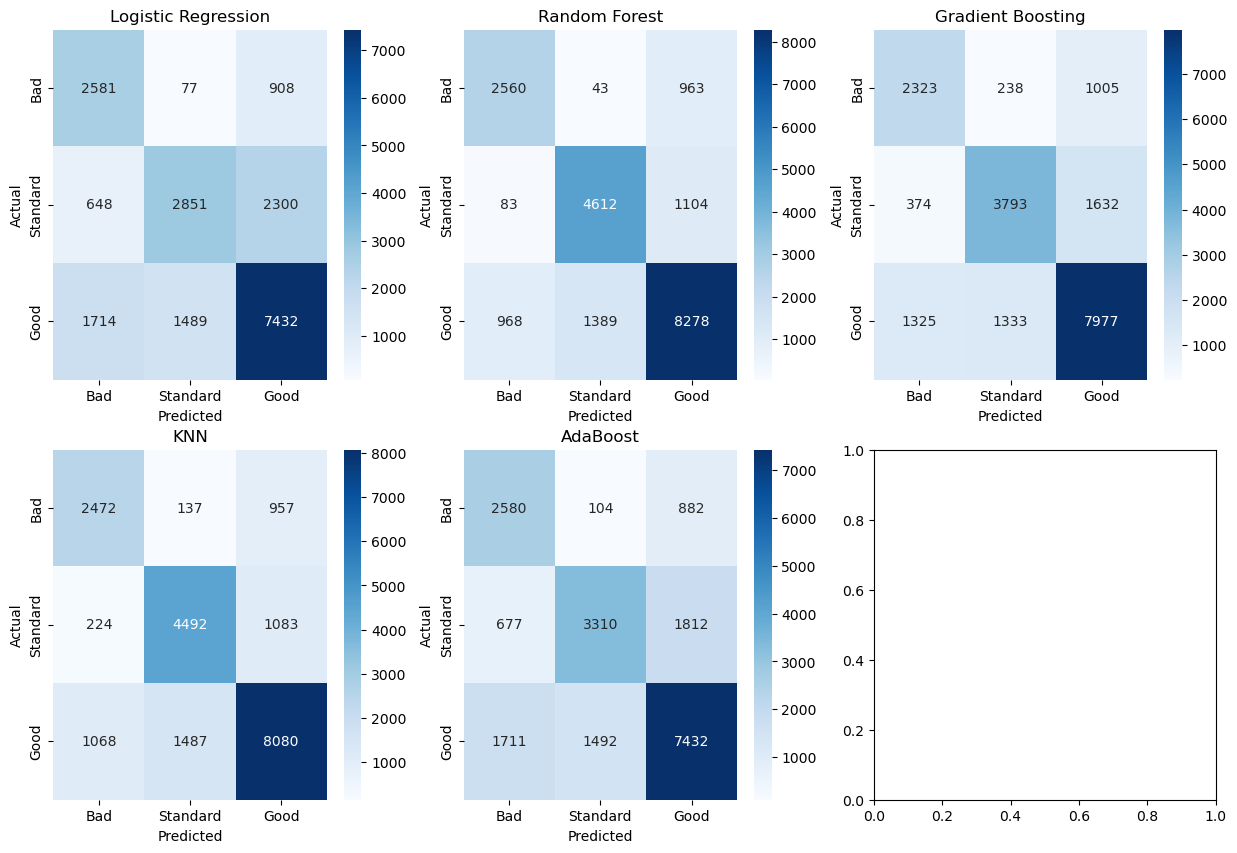

In [156]:
# Set up figure size for multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten() 
# Define class labels 
class_labels = ["Bad", "Standard", "Good"]

# Loop through each model and generate confusion matrix
for i, (name, model) in enumerate(models.items()):
    # Train model
    model.fit(X_train_selected, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test_selected)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix as heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, ax=axes[i])
    axes[i].set_title(f"{name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

In [157]:
# Define Stratified K-Fold (Ensures balanced class distribution across folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [158]:
# Dictionary to store cross-validation results
cv_results = {}

In [159]:
# Loop through models and evaluate using cross-validation
for name, model in models.items():
    start_time = time.time()
    
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_train_selected, y_train, cv=cv, scoring='accuracy')
    
    # Store mean accuracy and standard deviation
    cv_results[name] = {
        "Mean Accuracy": np.mean(scores),
        "Std Dev": np.std(scores)
    }
    
    # Print results
    print(f"{name}: Mean Accuracy = {np.mean(scores):.4f} ± {np.std(scores):.4f} (Time: {time.time() - start_time:.2f}s)")

Logistic Regression: Mean Accuracy = 0.6408 ± 0.0048 (Time: 0.76s)
Random Forest: Mean Accuracy = 0.7659 ± 0.0024 (Time: 22.45s)
Gradient Boosting: Mean Accuracy = 0.7060 ± 0.0020 (Time: 47.10s)
KNN: Mean Accuracy = 0.7372 ± 0.0026 (Time: 2.47s)


c:\Users\ZAID\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ZAID\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ZAID\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ZAID\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ZAID\an

AdaBoost: Mean Accuracy = 0.6667 ± 0.0017 (Time: 5.28s)


In [160]:
# Convert results to a DataFrame
cv_results_df = pd.DataFrame(cv_results).T
# Sort by Mean Accuracy
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)

In [161]:
# Display results
print("\nCross-Validation Results:")
print(cv_results_df)


Cross-Validation Results:
                     Mean Accuracy   Std Dev
Random Forest             0.765862  0.002350
KNN                       0.737150  0.002553
Gradient Boosting         0.705987  0.001986
AdaBoost                  0.666738  0.001747
Logistic Regression       0.640813  0.004839


#### As we can see, we are getting the best performance out of Random Forrest. Let's move ahead with it towards hyperparameter tuning

In [162]:
# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200],  # Number of trees
    "max_depth": [10, 20],  # Depth of trees
    "min_samples_split": [2, 5,],  # Minimum samples to split
    "min_samples_leaf": [1, 2, 4]    # Minimum samples per leaf
}

In [163]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [164]:

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2)

In [165]:
# Fit GridSearchCV
grid_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END max_depth=10, min_sa

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [166]:
# Print best parameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [167]:
# Get best model from GridSearch
best_rf = grid_search.best_estimator_

In [168]:
# Evaluate on test set
y_pred = best_rf.predict(X_test_selected)

In [169]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Random Forest Accuracy: {accuracy:.4f}")

Optimized Random Forest Accuracy: 0.7835


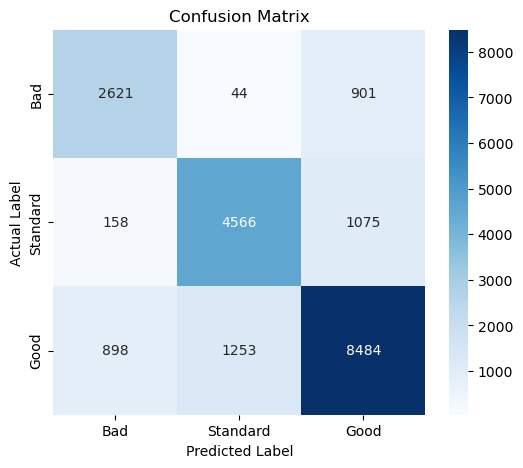

In [171]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()